In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
destination_path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"

In [3]:
tweets_with_urls = pd.read_parquet(destination_path+'tweets_w_urls_decompressed (1.0).parquet',
                               engine='fastparquet')

In [ ]:
tweets_with_urls.info()

In [102]:
value = []
for i in tqdm(tweets_with_urls["urls"]):
    url_exp = i.split(" ")
    lst_inside = []
    for exp in range(len(url_exp)):
        if url_exp[exp] == "'expanded_url':":
            lst_inside.append(url_exp[exp+1][1:-2])
    value.append(lst_inside)


In [103]:
def extract_domain_list(url_list):
    domain_list = []
    cont = 0
    for url in url_list:
        cont = cont + 1
        inside = []
        for i in url:
            try:
                x = i.split("/")[2]
            except:
                x = "napolimagazine.com"
            if "www." in x:
                x = x[4:]
            inside.append(x)
        domain_list.append(inside)
    return domain_list

In [104]:
x = extract_domain_list(value)

In [108]:
print(len(x))
print(len(tweets_with_urls))
tweets_with_urls["domain"] = x

1030912
1030912


In [110]:
tweets_with_urls.to_parquet(destination_path+"tweets_with_domains (2.0).parquet", index=False)

# Domain with the same name written in a different way

In [113]:
def normalize_domains(domain_list):
    for idx in range(len(domain_list)):
        domain=domain_list[idx]
        if domain in domain_normalize_df['initial_domain'].values:
            domain_list[idx] = domain_list[idx].replace(domain, domain_normalize_df[domain_normalize_df['initial_domain']==domain]['final_domain'].values[0])
    return domain_list

In [3]:
path_cred = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Files/"

In [66]:
#read csv with "initial_domain" and "final_domain" to substitute name of same domain expressed in different ways
domain_normalize_df = pd.read_csv(path_cred+'Domain_to_normalize.csv', sep=',')
domain_normalize_df.drop_duplicates(inplace=True)
domain_normalize_df

In [130]:
#create df with one row for every domain
domain_df = tweets_with_urls['domain'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index') #create df of url with one url per row

# Credibility

In [5]:
path_cred = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/"

In [6]:
#change path and filename 
wider_cred_sources_df = pd.read_csv(path_cred+'final_urls.csv')
high_cred_df = wider_cred_sources_df[wider_cred_sources_df['credibility'] == 'high']
high_cred_df.drop_duplicates(inplace=True)
low_cred_df = wider_cred_sources_df[wider_cred_sources_df['credibility'] == 'low']
low_cred_df.drop_duplicates(inplace=True)

In [7]:
high_cred_df

,url,credibility
40,noidiminerva.it,high
43,superquark.rai.it,high
45,leganerd.com,high
49,medicisenzafrontiere.it,high
50,avvenire.it,high
...,...,...
1553,umbriajournal.com,high
1554,sardiniapost.it,high
1555,emergency-live.com,high
1556,newsmondo.it,high


In [8]:
low_cred_df

,url,credibility
0,il-quotidiano.info,low
1,terrarealtime.blogspot.com,low
2,it.sputniknews.com,low
3,laverita.info,low
4,liberoquotidiano.it,low
...,...,...
1552,lecronachelucane.it,low
1557,tristemondo.it,low
1559,pointofnews.it,low
1560,m.dagospia.com,low


In [9]:
low_cred_df = low_cred_df.rename(columns={"url": "LOW"})
high_cred_df = high_cred_df.rename(columns={"url": "HIGH"})

In [10]:
social_media_df = pd.read_excel(path_cred+'social_media_sources.xlsx')
social_media_df.drop_duplicates(inplace=True)

In [11]:
social_media_df

,SOCIAL-MEDIA
0,twitter.com
1,instagram.com
2,youtu.be
3,youtube.com
4,facebook.com
6,lnkd.in
7,t.me
8,m.facebook.com
9,t.co
10,pscp.tv


In [12]:
print(f'Possible low credibility sources = {len(low_cred_df)}')
print(f'Possible high credibility sources = {len(high_cred_df)}')
print(f'Possible social media sources = {len(social_media_df)}')

Possible low credibility sources = 1244
Possible high credibility sources = 281
Possible social media sources = 12


In [13]:
tweets_with_urls = pd.read_parquet("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/tweets_with_domains (2.0).parquet")

In [14]:
lst = []
lst_domains = []
for row in tqdm(tweets_with_urls.itertuples()):
    lst_inside = []
    for i in row.domain:
        lst_inside.append(i.lower())
    lst.append(len(row.domain))
    lst_domains.append(lst_inside)
tweets_with_urls["number_of_urls"] = lst
tweets_with_urls["domain"] = lst_domains

In [15]:
low = list(low_cred_df["LOW"])
high = list(high_cred_df["HIGH"])
social = list(social_media_df["SOCIAL-MEDIA"])
list_of_low = []
list_of_high = []
list_of_unkw = []
list_of_social = []
for row in tqdm(tweets_with_urls.itertuples()):
    value_low = 0
    value_high = 0
    value_unk= 0
    value_social = 0
    for domain in row.domain:
        if domain in low:
            value_low = value_low + 1 
        elif domain in high:
            value_high = value_high + 1
        elif domain in social:
            value_social = value_social + 1
        else:
            value_unk = value_unk+ 1
    list_of_low.append(value_low)
    list_of_high.append(value_high)
    list_of_unkw.append(value_unk)
    list_of_social.append(value_social)

In [16]:
tweets_with_urls['LOW'] = list_of_low
tweets_with_urls['HIGH'] = list_of_high
tweets_with_urls['UNKW'] = list_of_unkw
tweets_with_urls['SOCIAL'] = list_of_social

In [17]:
tweets_without_useless = tweets_with_urls[
    (tweets_with_urls["urls"].str.contains("twitter.com")==False) &
    (tweets_with_urls["urls"].str.contains("dlvr.it")==False) &
    (tweets_with_urls["urls"].str.contains("bit.ly")==False) &
    (tweets_with_urls["urls"].str.contains("ow.ly")==False) &
    (tweets_with_urls["urls"].str.contains("ift.tt")==False) & 
    (tweets_with_urls["urls"].str.contains("tinyurl")==False) & 
    (tweets_with_urls["urls"].str.contains("trib.al")==False) & 
    (tweets_with_urls["urls"].str.contains("zpr.io")==False) & 
    (tweets_with_urls["urls"].str.contains("is.gd")==False) &
    (tweets_with_urls["urls"].str.contains("buff.ly")==False)]

In [18]:
lst_unique = []
for i in tweets_without_useless["domain"]:
    for j in i:
        lst_unique.append(j)
cont_1 = 0
cont_2 = 0
for i in list(pd.Series(lst_unique).unique()):
    if (i in low) | (i in high) | (i in social):
        cont_1 = cont_1 + 1
    cont_2 = cont_2 + 1
print(cont_1)
print(cont_2)
print(f"Domain classified: {round(cont_1/cont_2,2)*100}%")
x = pd.Series(lst_unique).value_counts().sort_values(ascending=False)
cont1 = 0
cont2 = 0
for k,v in x.items():
    if (k in low) | (k in high) | (k in social):
        cont1 = cont1 + v
    cont2 = cont2 + v
print(f"Volume classified: {round(cont1/cont2,2)*100}%")    

465
14966
Domain classified: 3.0%
Volume classified: 71.0%


In [18]:
# tweets_without_useless[tweets_without_useless["user_screen_name"].str.contains("Federica989111")]
# for i in tweets_without_useless[tweets_without_useless["user_screen_name"].str.contains("byoblu")]["text"]:
#     print(i)
#     print("........................")

In [19]:
# lst = []
# for i in tqdm(tweets_without_useless[tweets_without_useless["user_screen_name"]=="Mr_Ozymandias"]["domain"]):
#     lst.append(i)
# pd.Series(lst).value_counts().sort_values(ascending=False)[:20]

In [20]:
# lst2 = []
# for i in tqdm(tweets_without_useless[tweets_without_useless["number_of_urls"]>0]["domain"]):
#     for value in i:
#         lst2.append(value)

In [19]:
sum_of_urls_df = tweets_without_useless.groupby(['user_screen_name'])[['number_of_urls','HIGH','LOW','UNKW','SOCIAL']].sum()
sum_of_urls_df=sum_of_urls_df.sort_values(by=['number_of_urls'], ascending=False)
sum_of_urls_df.head(10)

,number_of_urls,HIGH,LOW,UNKW,SOCIAL
user_screen_name,,,,,
infoitinterno,17471,33,17267,171,0
infoitsalute,16086,33,15859,194,0
infoiteconomia,6120,24,6031,65,0
zazoomblog,6033,0,6024,9,0
IacobellisT,3562,25,1339,388,1810
Notiziedi_it,3529,3529,0,0,0
Novanews242,3307,1,3284,7,15
TommyBrain,3245,31,1260,338,1616
infoitesteri,3095,17,3037,41,0


In [20]:
sum_of_urls_df.corr()

,number_of_urls,HIGH,LOW,UNKW,SOCIAL
number_of_urls,1.000000,0.302005,0.943564,0.293860,0.220108
HIGH,0.302005,1.000000,0.024500,0.146985,0.052057
LOW,0.943564,0.024500,1.000000,0.114637,0.081913
UNKW,0.293860,0.146985,0.114637,1.000000,0.228227
SOCIAL,0.220108,0.052057,0.081913,0.228227,1.000000


In [21]:
threshold_high_low = 10
sum_of_urls_df_prova = sum_of_urls_df[sum_of_urls_df['number_of_urls']>=threshold_high_low]

In [22]:
sum_of_urls_df_prova['conspiracy_score'] = np.around(((sum_of_urls_df_prova['LOW'])/(sum_of_urls_df_prova['HIGH']+sum_of_urls_df_prova['LOW'])),2)
sum_of_urls_df_prova=sum_of_urls_df_prova.sort_values(by=['conspiracy_score'], ascending=False)
sum_of_urls_df_prova.head(10)

,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
user_screen_name,,,,,,
infoitinterno,17471,33,17267,171,0,1.0
Paolo90777,18,0,5,0,13,1.0
giuseppecarta73,17,0,1,15,1,1.0
ZiaGabriella1,11,0,7,3,1,1.0
lapillo1,36,0,3,1,32,1.0
terry57,36,0,33,3,0,1.0
LuciaKetels,17,0,3,4,10,1.0
dazebao,17,0,17,0,0,1.0
SUSANNA60128891,11,0,8,3,0,1.0


In [23]:
sum_of_urls_df_prova.reset_index(inplace=True)
sum_of_urls_df_prova[sum_of_urls_df_prova["user_screen_name"]=="byoblu"]

,user_screen_name,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
317,byoblu,62,2,59,0,1,0.97


In [24]:
sum_of_urls_df_prova.to_csv(destination_path+"result_cred_score_thresh_10.csv",
                            index=True, encoding="utf-8", line_terminator="\n")

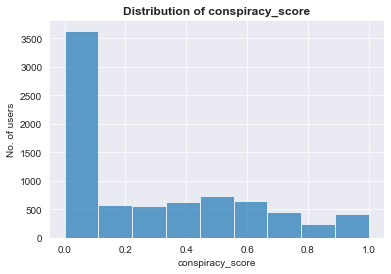

In [25]:
# distribution of scores
plt.hist(list(sum_of_urls_df_prova['conspiracy_score']), bins=9, alpha=0.7)
plt.xlabel('conspiracy_score')
plt.ylabel('No. of users')
plt.title('Distribution of conspiracy_score', weight='bold')
#plt.savefig('plots/dist', bbox_inches='tight')
plt.show()

In [91]:
print(len(sum_of_urls_df_prova)-len(sum_of_urls_df_prova[sum_of_urls_df_prova["conspiracy_score"].notna()]))
sum_of_urls_df_prova.head(20)

967


,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
user_screen_name,,,,,,
infoitinterno,17471,33,17267,171,0,1.0
CDonChisciotte,117,0,117,0,0,1.0
Toba_60,266,0,266,0,0,1.0
simpli_cissimus,64,0,64,0,0,1.0
fainformazione,258,0,257,1,0,1.0
pointofnews,251,1,250,0,0,1.0
PecheanuA,23,0,3,20,0,1.0
tristemondo,248,0,248,0,0,1.0
abruzzoweb,40,0,40,0,0,1.0


In [92]:
sum_of_urls_df_prova[sum_of_urls_df_prova["conspiracy_score"]>=0.50]

,number_of_urls,HIGH,LOW,UNKW,SOCIAL,conspiracy_score
user_screen_name,,,,,,
infoitinterno,17471,33,17267,171,0,1.0
CDonChisciotte,117,0,117,0,0,1.0
Toba_60,266,0,266,0,0,1.0
simpli_cissimus,64,0,64,0,0,1.0
fainformazione,258,0,257,1,0,1.0
...,...,...,...,...,...,...
Gesefi_onlus_it,24,6,6,12,0,0.5
Iridediluce,24,4,4,8,8,0.5
Stefano15067453,28,2,2,6,18,0.5


In [27]:
tweets_without_useless.to_csv(r"C:\Users\gianl\Desktop\Gi\Supsi\Vaccines_Discussion_Italy\Laura\Tweets\tweets_without_useless_and_score (5.0).csv", line_terminator="\n", index=False, encoding="utf-8")